## Базовый SQL 



### Введение в Базы данных

Перевести код в формат SQL 

[перевести в SQL ](https://sqlformat.org/)

### PySpark

#### Spark и RDD

Познакомимся с библиотекой Spark и её ключевым типом данных — отказоустойчивым распределённым набором данных (англ. Resilient Distributed Dataset, RDD).
Apache Spark — фреймворк для распределённых вычислений с открытым исходным кодом. Это разработка компании Apache Software Foundation. Spark позволяет распределять и обрабатывать данные на нескольких компьютерах одновременно. Изначально был написан на языке программирования Scala. Для работы в Python выпустили библиотеку PySpark (англ. «искра для Python»). 

Отказоустойчивые распределённые наборы данных — тип структуры данных, которые можно распределить между несколькими узлами в кластере. RDD — основной инструмент для преобразования данных и часть датафреймов.

Приступим к написанию кода. Первым делом импортируем из библиотеки PySpark объект SparkContext (англ. «контекст для Spark»). Он отвечает за операции с кластером в Spark. 

Инициализируем объект SparkContext и передадим ему настройки. Это могут быть URL-адрес мастер-узла и название приложения. Например, укажем наше приложение IntroToSpark (англ. «Введение в Spark»).

In [ ]:
from pyspark import SparkContext

# sc — от англ. spark context
# appName — от англ. application name, название приложения
sc = SparkContext(appName="IntroToSpark")

Вызовом функции sc.parallelize() (англ. «параллелизовать») можно перевести список в RDD.

Для решения задачи о такси создадим RDD с именем taxi_entry (англ. «запись о заказе такси»), передав функции список с данными: дата, час, минута и количество заказов за последние полчаса:

In [ ]:
taxi_entry = sc.parallelize(['2009-01-01', 0, 0, 24])

#### Датафреймы в PySpark

Хранить и обрабатывать данные можно не только в формате RDD, но и в датафреймах. Узнаем, чем они отличаются от датафреймов в Pandas.

Датафрейм в PySpark — это таблица, строки которой хранятся в RDD. Он похож на датафрейм в Pandas, но есть отличия:  
- В PySpark датафреймы неизменяемые. То есть добавление или переименование столбца приводит к созданию копии существующего датафрейма.

- Работа с датафреймами ведётся по принципу «ленивых вычислений» (англ. lazy evaluations). Это вычисления, которые откладываются до тех пор, пока пользователь не запросит их результат. Посмотреть на датафрейм можно после вызова функций collect() (англ. «собирать») или show() (англ. «показывать»).

Для работы с распределённой файловой системой нужен специальный интерфейс передачи данных — DataFrame API. Он находится в модуле Spark SQL в библиотеке PySpark. SQL-запрос можно написать в командной строке этого модуля, то есть без импорта из библиотеки.

Повторим: доступ к библиотеке PySpark, в которой создавали RDD, нам предоставил объект SparkContext. Есть и другая точка доступа — это объект SparkSession (англ. «сессия для Spark»). 

Создадим объект SparkSession вызовом функции getOrCreate() (англ. «получить или создать»):

In [ ]:
from pyspark.sql import SparkSession
 
APP_NAME = 'sampleApp'

# builder — англ. конструктор сессии
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

#### Создание датафреймов

Изучим, как в PySpark преобразовывать датафреймы из Pandas и читать их из файла.
Датафреймы в PySpark состоят из строк. В отличие от Pandas, строка в PySpark — это тип данных, который содержит имена столбцов и их значения в каждой строке таблицы.
Вызовом функции createDataFrame() (англ. «создать датафрейм») переведём датафрейм из Pandas в PySpark:

In [ ]:
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession

APP_NAME = "DataFrames"
SPARK_URL = "local[*]"

spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

taxi_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/11_SQL/data/pickups_terminal_5.csv')
taxi = spark.createDataFrame(taxi_df)

print(taxi)

In [ ]:
# Для извлечения данных применим метод take(): 
collected_taxi = taxi.take(5)
print(collected_taxi) 

Чтобы избавиться от отображения прогресса, при создании объекта SparkSession добавим настройку showConsoleProgress (англ. «показывать прогресс в консоли»), равную false.

In [ ]:
# переносить строки в Python можно символом '\'
spark = SparkSession.builder.appName(APP_NAME) \
        .config('spark.ui.showConsoleProgress', 'false') \
        .getOrCreate()

Чтобы загрузить датафрейм из csv-файла, у объекта SparkSession возьмём атрибут read (англ. «чтение»). Вызовем у атрибута функцию load(). Эта функция принимает путь к файлу и параметры загрузки, а возвращает датафрейм PySpark. 

Прочитаем csv-файл. Обратите внимание: значения true и false записываются строчными буквами.

In [ ]:
# format='csv' — укажите формат файла
# header='true' — укажите, что в файле есть заголовок (имена столбцов)
# inferSchema='true' — англ. выводить схему,
#    укажите, что типы данных должны быть выведены
taxi = spark.read.load('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/11_SQL/data/pickups_terminal_5.csv', 
                       format='csv', header='true', inferSchema='true')

Печатаем 5 строк из такой таблицы

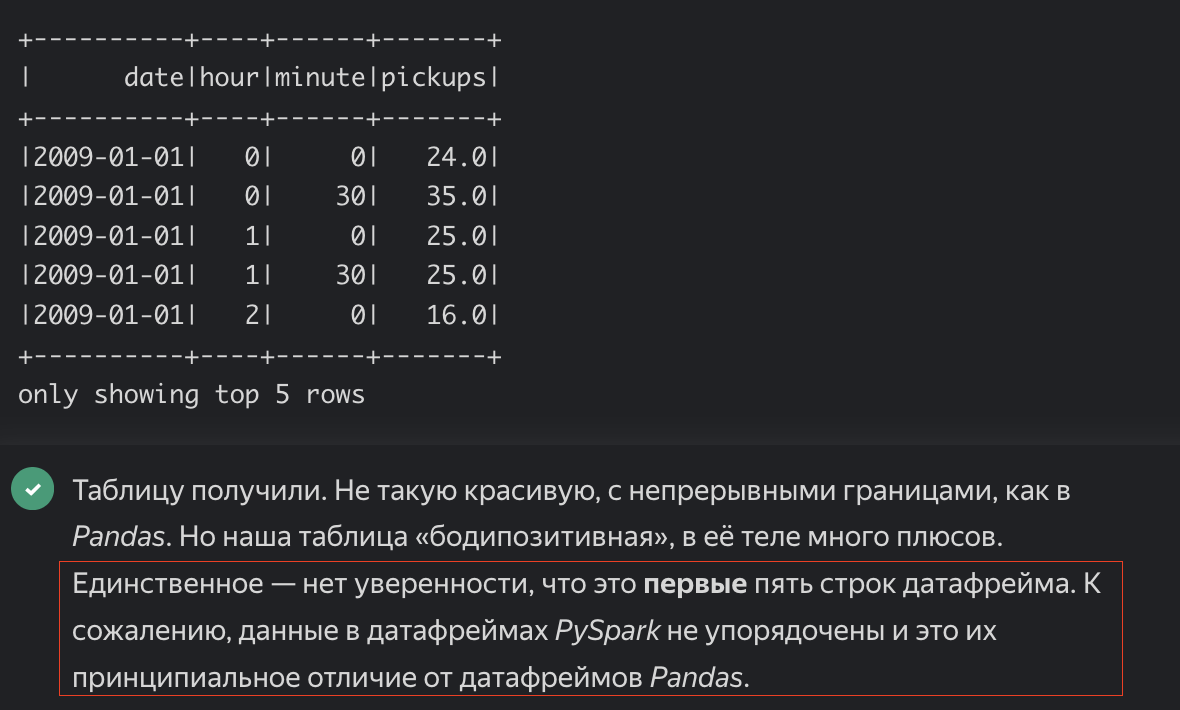

In [ ]:
print(taxi.show(5))

In [7]:
import pandas as pd
df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/11_SQL/data/pickups_terminal_5.csv')
df.head()

,date,hour,minute,pickups
0,2009-01-01,0,0,24.0
1,2009-01-01,0,30,35.0
2,2009-01-01,1,0,25.0
3,2009-01-01,1,30,25.0
4,2009-01-01,2,0,16.0


In [9]:
df.columns

Index(['date', 'hour', 'minute', 'pickups'], dtype='object')

#### SQL-запросы в датафреймах
Узнаем, как проводить исследовательский анализ данных в PySpark SQL.

In [ ]:
print(taxi.summary().show()) 

Исследовательский анализ - результат

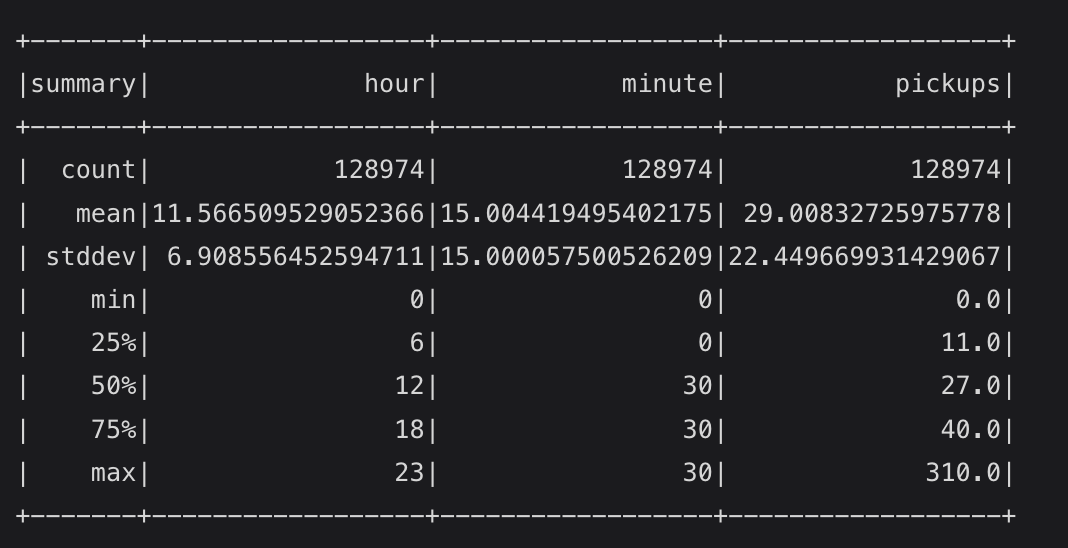

In [ ]:
# формируем sql-запрос

result = spark.sql("SELECT * FROM taxi order by pickups desc")

print(result.show(5))

результат 

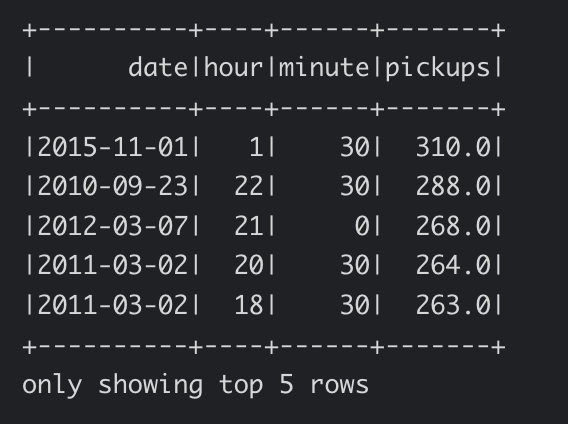

#### GroupBy в PySpark

In [ ]:
print(spark.sql('SELECT EXTRACT(month from date) , AVG(pickups) FROM taxi '
                'GROUP BY EXTRACT(month from date)  ORDER BY AVG(pickups) DESC').show()) 

Результат группировки